# Install Requirements

In [10]:
# Don't need to run this block if you have the packages installed

%pip install openpyxl
%pip install xgboost
%pip install plotnine
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Importing Python modules

In [11]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from plotnine import ggplot, aes, geom_point, scale_color_gradient
from datetime import datetime

color = sns.color_palette()
np.random.seed(1)

# Read CSV files

### Train_2016

In [12]:
train_2016_df = pd.read_csv("train_2016.csv", parse_dates=["transactiondate"])
train_2016_df.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [13]:
train_2016_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90275 entries, 0 to 90274
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   parcelid         90275 non-null  int64         
 1   logerror         90275 non-null  float64       
 2   transactiondate  90275 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.1 MB


### Train_2017

In [14]:
train_2017_df = pd.read_csv("train_2017.csv", parse_dates=["transactiondate"])
train_2017_df.head()

,parcelid,logerror,transactiondate
0,14297519,0.025595,2017-01-01
1,17052889,0.055619,2017-01-01
2,14186244,0.005383,2017-01-01
3,12177905,-0.103410,2017-01-01
4,10887214,0.006940,2017-01-01


In [15]:
train_2017_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77613 entries, 0 to 77612
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   parcelid         77613 non-null  int64         
 1   logerror         77613 non-null  float64       
 2   transactiondate  77613 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.8 MB


### Properties_2016

In [16]:
properties_2016_df = pd.read_csv("properties_2016.csv")
properties_2016_df.head()

/var/folders/kx/sr7brjjx11x4qvpt5ybtpqd40000gn/T/ipykernel_29920/2953095298.py:1: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [17]:
properties_2016_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   parcelid                      int64  
 1   airconditioningtypeid         float64
 2   architecturalstyletypeid      float64
 3   basementsqft                  float64
 4   bathroomcnt                   float64
 5   bedroomcnt                    float64
 6   buildingclasstypeid           float64
 7   buildingqualitytypeid         float64
 8   calculatedbathnbr             float64
 9   decktypeid                    float64
 10  finishedfloor1squarefeet      float64
 11  calculatedfinishedsquarefeet  float64
 12  finishedsquarefeet12          float64
 13  finishedsquarefeet13          float64
 14  finishedsquarefeet15          float64
 15  finishedsquarefeet50          float64
 16  finishedsquarefeet6           float64
 17  fips                          float64
 18  fireplacecnt          

### Properties 2017

In [18]:
properties_2017_df = pd.read_csv("properties_2017.csv")
properties_2017_df.head()

/var/folders/kx/sr7brjjx11x4qvpt5ybtpqd40000gn/T/ipykernel_29920/4207825859.py:1: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,...,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


In [19]:
properties_2017_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   parcelid                      int64  
 1   airconditioningtypeid         float64
 2   architecturalstyletypeid      float64
 3   basementsqft                  float64
 4   bathroomcnt                   float64
 5   bedroomcnt                    float64
 6   buildingclasstypeid           float64
 7   buildingqualitytypeid         float64
 8   calculatedbathnbr             float64
 9   decktypeid                    float64
 10  finishedfloor1squarefeet      float64
 11  calculatedfinishedsquarefeet  float64
 12  finishedsquarefeet12          float64
 13  finishedsquarefeet13          float64
 14  finishedsquarefeet15          float64
 15  finishedsquarefeet50          float64
 16  finishedsquarefeet6           float64
 17  fips                          float64
 18  fireplacecnt          

### Sample_submission

In [20]:
test = pd.read_csv('sample_submission.csv')
# To make it easier for merging datasets on same column_id later
test= test.rename(columns={'ParcelId': 'parcelid'})
print(f'test.shape: {test.shape}')
test.head()

test.shape: (2985217, 7)


,parcelid,201610,201611,201612,201710,201711,201712
0,10754147,0,0,0,0,0,0
1,10759547,0,0,0,0,0,0
2,10843547,0,0,0,0,0,0
3,10859147,0,0,0,0,0,0
4,10879947,0,0,0,0,0,0


### Zillow_data_dictionary

In [21]:
# read the excel file
zillow_data_dictionary_df = pd.ExcelFile('zillow_data_dictionary.xlsx')

# Track sheet names
sheet_names = zillow_data_dictionary_df.sheet_names

# Create an empty dictionary to store all contents
zillow_data_dictionary = {}

# Loop through the sheets and read them into dataframes
for sheet_name in sheet_names:
    if sheet_name == 'Data Dictionary':  # Skip this sheet
        continue
    sheet_data = {}
    for index, row in zillow_data_dictionary_df.parse(sheet_name).iterrows():
        sheet_data[row.iloc[0]] = row.iloc[1]
    zillow_data_dictionary[sheet_name] = sheet_data

for key, value in zillow_data_dictionary.items():
    print(key, value)

HeatingOrSystemTypeID {1: 'Baseboard', 2: 'Central', 3: 'Coal', 4: 'Convection', 5: 'Electric', 6: 'Forced air', 7: 'Floor/Wall', 8: 'Gas', 9: 'Geo Thermal', 10: 'Gravity', 11: 'Heat Pump', 12: 'Hot Water', 13: nan, 14: 'Other', 15: 'Oil', 16: 'Partial', 17: 'Propane', 18: 'Radiant', 19: 'Steam', 20: 'Solar', 21: 'Space/Suspended', 22: 'Vent', 23: 'Wood Burning', 24: 'Yes', 25: 'Zone'}
PropertyLandUseTypeID {31: 'Commercial/Office/Residential Mixed Used', 46: 'Multi-Story Store', 47: 'Store/Office (Mixed Use)', 246: 'Duplex (2 Units, Any Combination)', 247: 'Triplex (3 Units, Any Combination)', 248: 'Quadruplex (4 Units, Any Combination)', 260: 'Residential General', 261: 'Single Family Residential', 262: 'Rural Residence', 263: 'Mobile Home', 264: 'Townhouse', 265: 'Cluster Home', 266: 'Condominium', 267: 'Cooperative', 268: 'Row House', 269: 'Planned Unit Development', 270: 'Residential Common Area', 271: 'Timeshare', 273: 'Bungalow', 274: 'Zero Lot Line', 275: 'Manufactured, Modular

### Merge data sets

In [22]:
# 2016
df_train_2016 = train_2016_df.merge(properties_2016_df, how='left', on='parcelid')
df_train_2016.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [23]:
# 2017
df_train_2017 = train_2017_df.merge(properties_2017_df, how='left', on='parcelid')
df_train_2017.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,14297519,0.025595,2017-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13
1,17052889,0.055619,2017-01-01,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13
2,14186244,0.005383,2017-01-01,NaN,NaN,NaN,2.0,3.0,NaN,NaN,...,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13
3,12177905,-0.103410,2017-01-01,NaN,NaN,NaN,3.0,4.0,NaN,8.0,...,NaN,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13
4,10887214,0.006940,2017-01-01,1.0,NaN,NaN,3.0,3.0,NaN,8.0,...,NaN,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,NaN,NaN,6.037124e+13


In [24]:
# properties_all_df = pd.concat([properties_2016_df, properties_2017_df], axis=0).reset_index(drop=True)
# df_test = test.merge(properties_all_df, how='left', on='parcelid')
# df_test.head()

df_test_2016 = test.merge(properties_2016_df, how='left', on='parcelid')
df_test_2016.head()

,parcelid,201610,201611,201612,201710,201711,201712,airconditioningtypeid,architecturalstyletypeid,basementsqft,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,0,0,0,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,0,0,0,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,0,0,0,0,0,0,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,0,0,0,0,0,0,NaN,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,0,0,0,0,0,0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


# Exploratory Data Analysis

### Log Error distribution

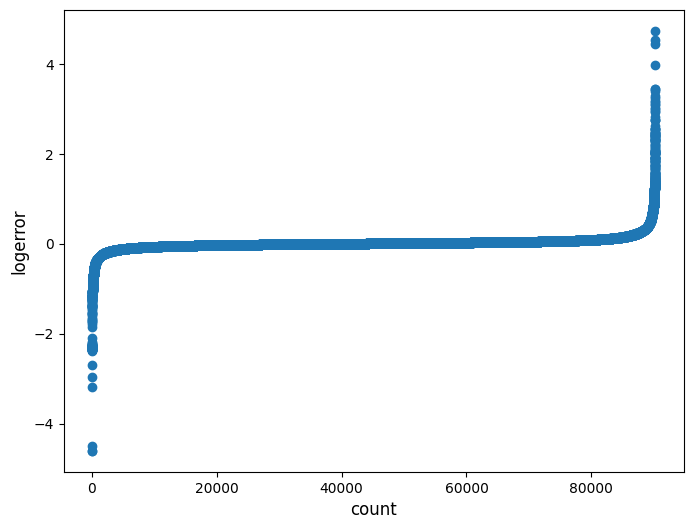

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(range(df_train_2016.shape[0]), np.sort(df_train_2016.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

### Transaction Date distribution

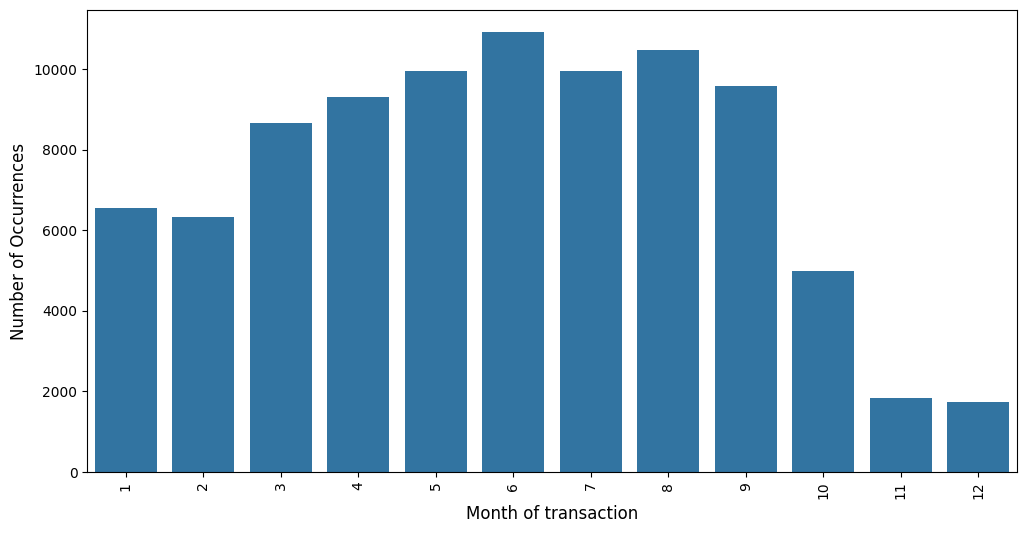

In [26]:
df_train_2016_months = df_train_2016['transactiondate'].dt.month

month_count = df_train_2016_months.value_counts()
plt.figure(figsize = (12,6))
sns.barplot(x=month_count.index, y=month_count.values)
plt.xticks(rotation = 'vertical')
plt.xlabel('Month of transaction', fontsize = 12)
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.show()

### Parcel Id Distribution

In [27]:
id_df = df_train_2016['parcelid'].value_counts().reset_index()
id_df.columns = ['parcelid', 'transaction_count']
id_df.groupby('transaction_count').aggregate('count').reset_index()

,transaction_count,parcelid
0,1,90026
1,2,123
2,3,1


### Latitude and Longitude

<Figure size 1200x1200 with 0 Axes>

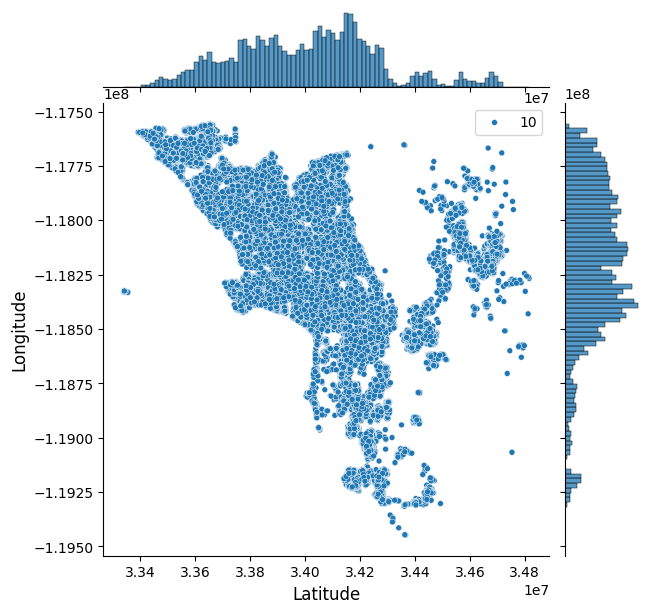

In [28]:
plt.figure(figsize=(12,12))
sns.jointplot(x=df_train_2016.latitude.values, y=df_train_2016.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

### Data Types

In [29]:
pd.options.display.max_rows = 65
dtype_df = df_train_2016.dtypes.reset_index()
dtype_df.columns = ['column', 'column type']
dtype_df.groupby('column type').aggregate('count').reset_index()

,column type,column
0,int64,1
1,float64,53
2,datetime64[ns],1
3,object,5


### Missing datas (NaN values)

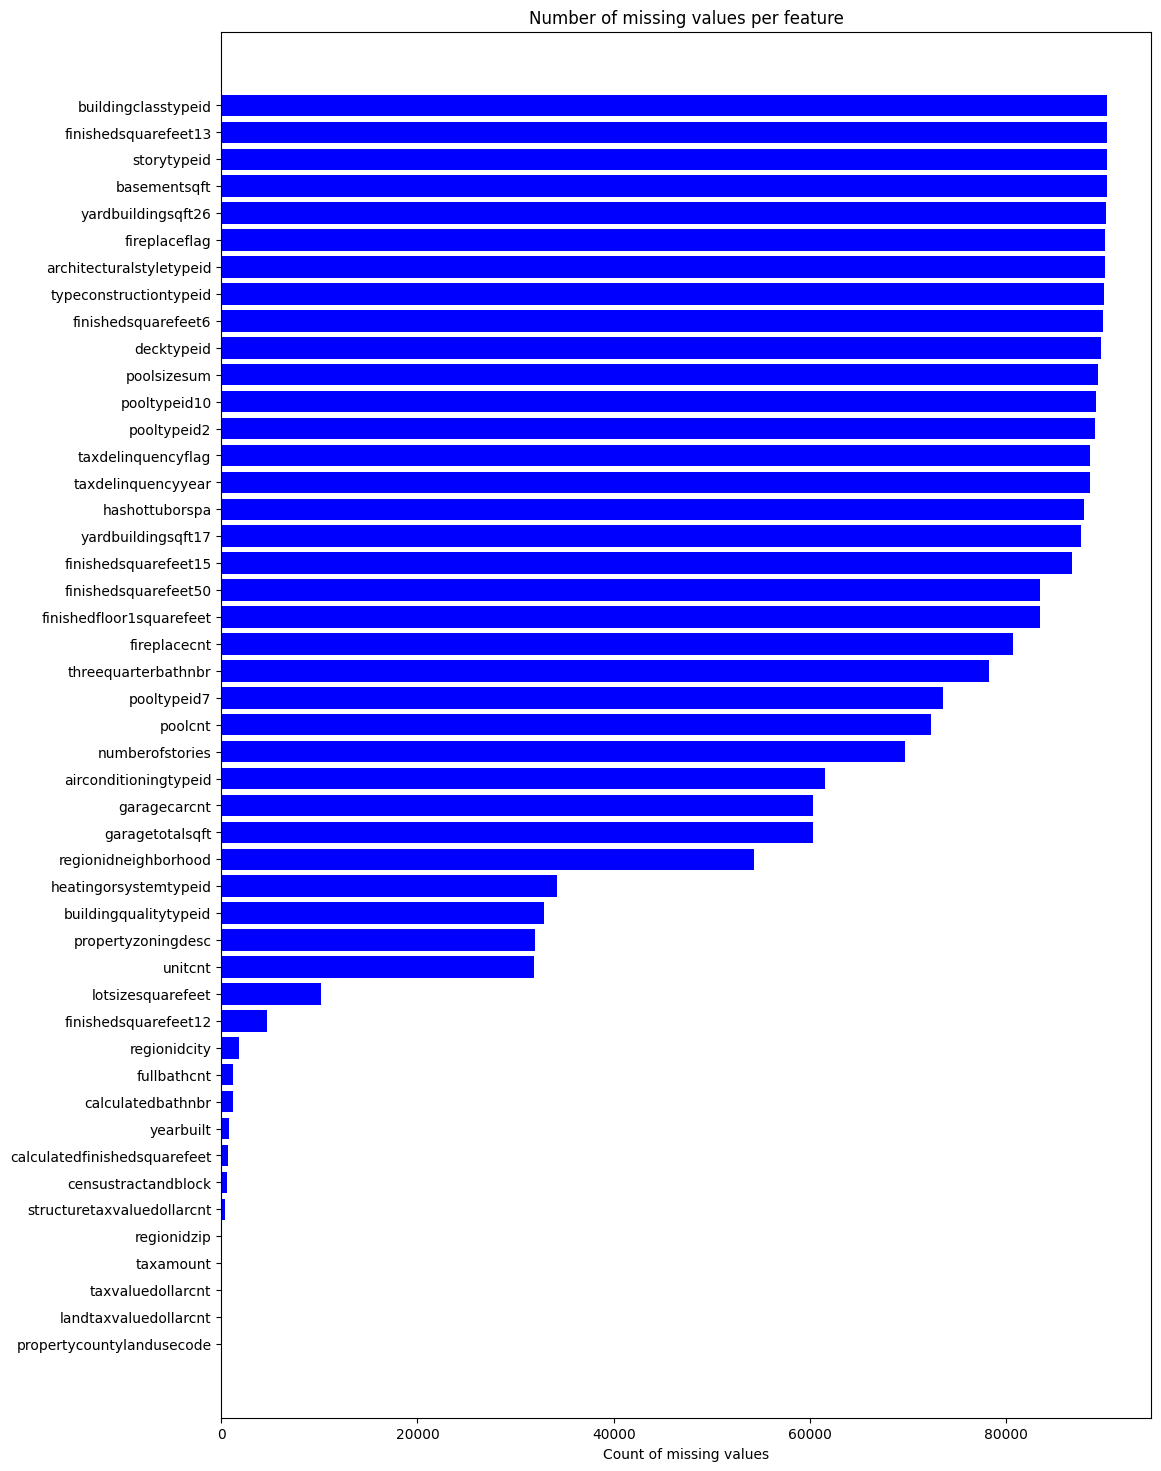

In [30]:
missing_df = df_train_2016.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count'] > 0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values per feature")
plt.show()

In [31]:
missing_df = df_train_2016.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / df_train_2016.shape[0]
missing_df.loc[missing_df['missing_ratio'] > 0.999]

,column_name,missing_count,missing_ratio
5,basementsqft,90232,0.999524
8,buildingclasstypeid,90259,0.999823
15,finishedsquarefeet13,90242,0.999634
43,storytypeid,90232,0.999524


### Univariate Analysis

/Users/wb/opt/anaconda3/envs/mlproj/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
/Users/wb/opt/anaconda3/envs/mlproj/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide


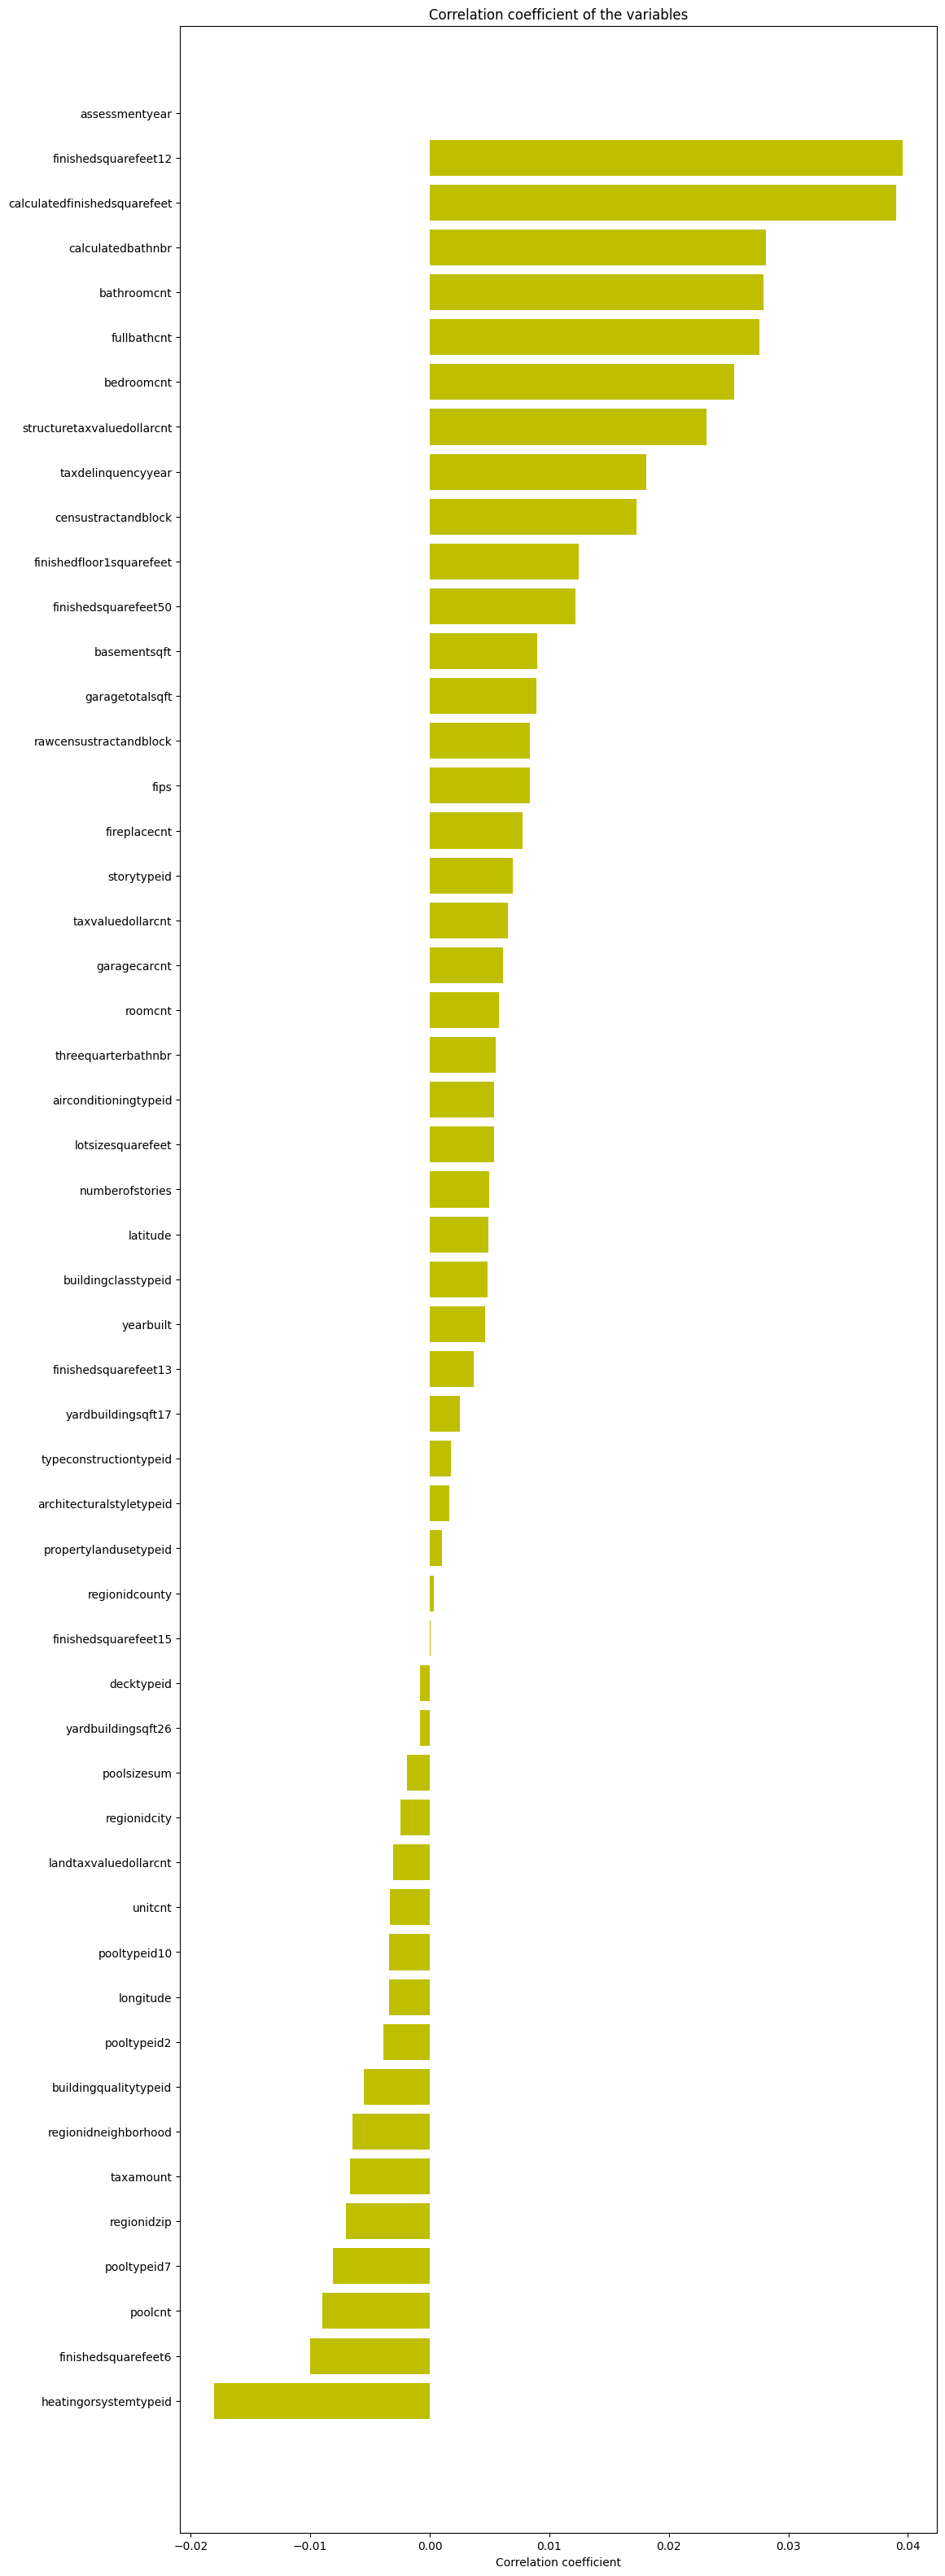

In [32]:
# for label encoding to process str inputs
lbl = LabelEncoder()
for c in df_train_2016.columns:
    df_train_2016[c]=df_train_2016[c].fillna(0)
    if df_train_2016[c].dtype == 'object':
        lbl.fit(list(df_train_2016[c].values))
        df_train_2016[c] = lbl.transform(list(df_train_2016[c].values))

for c in df_test_2016.columns:
    df_test_2016[c]=df_test_2016[c].fillna(0)
    if df_test_2016[c].dtype == 'object':
        lbl.fit(list(df_test_2016[c].values))
        df_test_2016[c] = lbl.transform(list(df_test_2016[c].values))

mean_values = df_train_2016.mean(axis = 0)
train_df_new = df_train_2016.fillna(mean_values)

x_cols = [col for col in train_df_new.columns if col not in ['logerror'] if train_df_new[col].dtype == 'float64']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(train_df_new[col].values, train_df_new.logerror.values)[0,1])

corr_df = pd.DataFrame({'col_labels' : labels, 'corr_values' : values})
corr_df = corr_df.sort_values(by='corr_values')

ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize = (12, 40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color = 'y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation = 'horizontal')
ax.set_xlabel('Correlation coefficient')
ax.set_title('Correlation coefficient of the variables')
plt.show()

### Variables with high correlation values

In [33]:
corr_df_sel = corr_df.loc[(corr_df['corr_values'] > 0.02) | (corr_df['corr_values'] < -0.01)]
corr_df_sel

,col_labels,corr_values
21,heatingorsystemtypeid,-0.018009
45,structuretaxvaluedollarcnt,0.023141
4,bedroomcnt,0.025467
18,fullbathcnt,0.027571
3,bathroomcnt,0.027889
7,calculatedbathnbr,0.028114
10,calculatedfinishedsquarefeet,0.039011
11,finishedsquarefeet12,0.039557


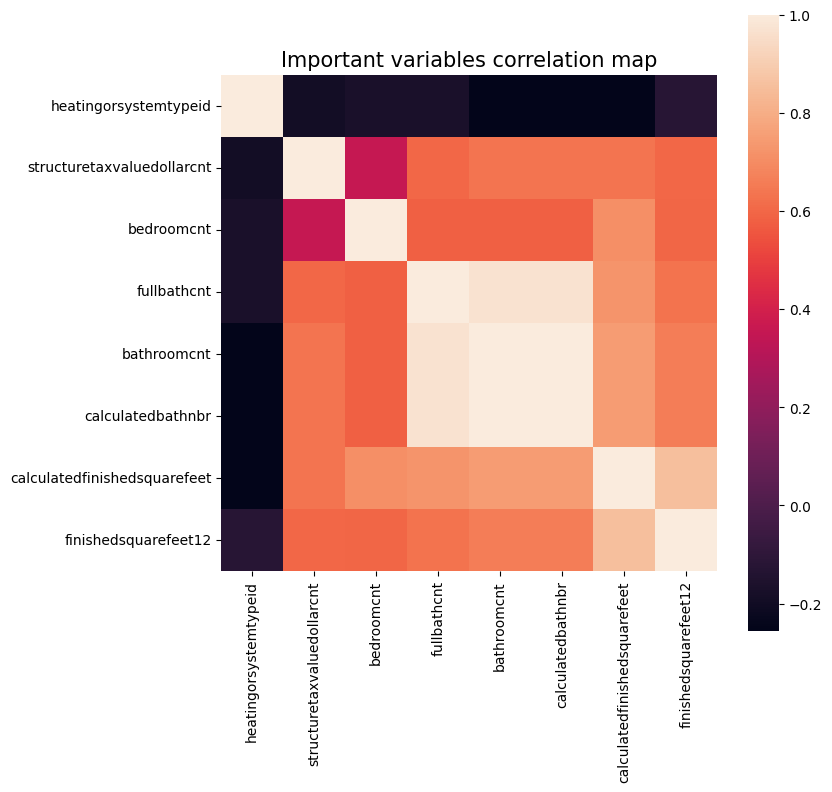

In [34]:
cols_to_use = corr_df_sel.col_labels.tolist()

temp_df = df_train_2016[cols_to_use]
corrmat = temp_df.corr(method = 'spearman')
f,ax = plt.subplots(figsize = (8,8))

sns.heatmap(corrmat, vmax = 1., square = True)
plt.title('Important variables correlation map', fontsize = 15)
plt.show()

### Finished SquareFeet 12 against Log Error

<Figure size 1000x1000 with 0 Axes>

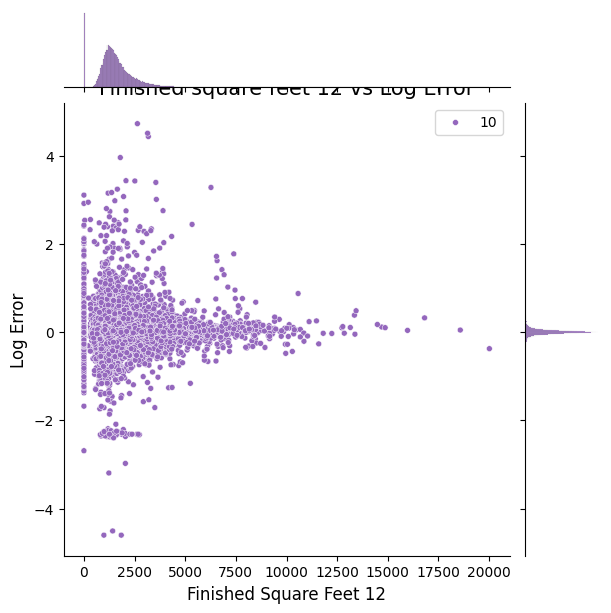

In [35]:
plt.figure(figsize = (10,10))
sns.jointplot(x = df_train_2016.finishedsquarefeet12.values, y = df_train_2016.logerror.values, size = 10, color = color[4])
plt.ylabel('Log Error', fontsize = 12)
plt.xlabel('Finished Square Feet 12', fontsize = 12)
plt.title('Finished square feet 12 vs Log Error', fontsize = 15)
plt.show()

### Log Error against longitude and latitude

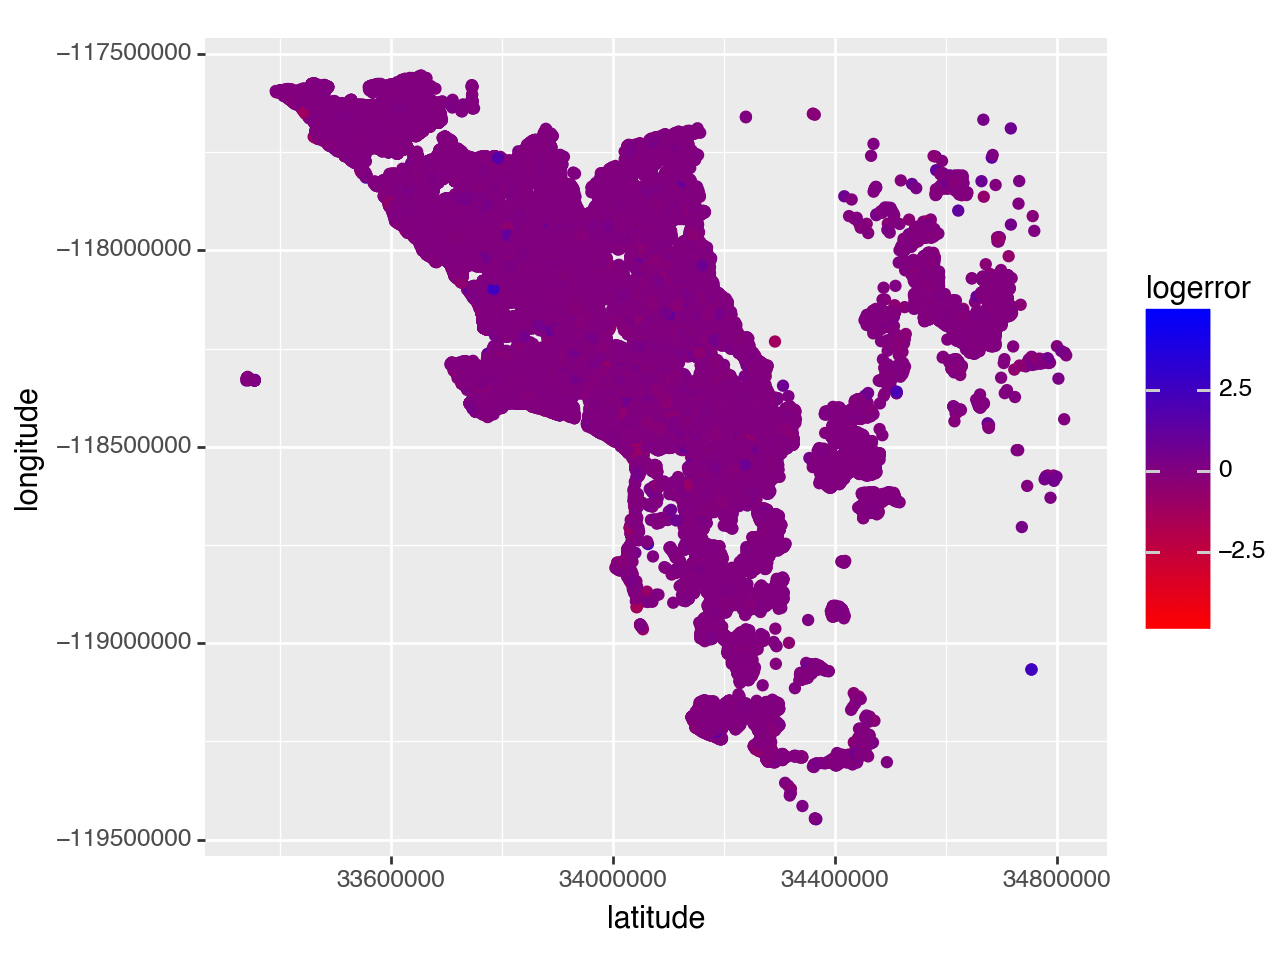

<Figure Size: (640 x 480)>

In [36]:
ggplot(df_train_2016) +aes(x='latitude', y='longitude', color = 'logerror') + geom_point()  + scale_color_gradient(low = 'red', high = 'blue')

# Feature Engineering

### Remove outliers from df_train_2016

/var/folders/kx/sr7brjjx11x4qvpt5ybtpqd40000gn/T/ipykernel_29920/299485783.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/kx/sr7brjjx11x4qvpt5ybtpqd40000gn/T/ipykernel_29920/299485783.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


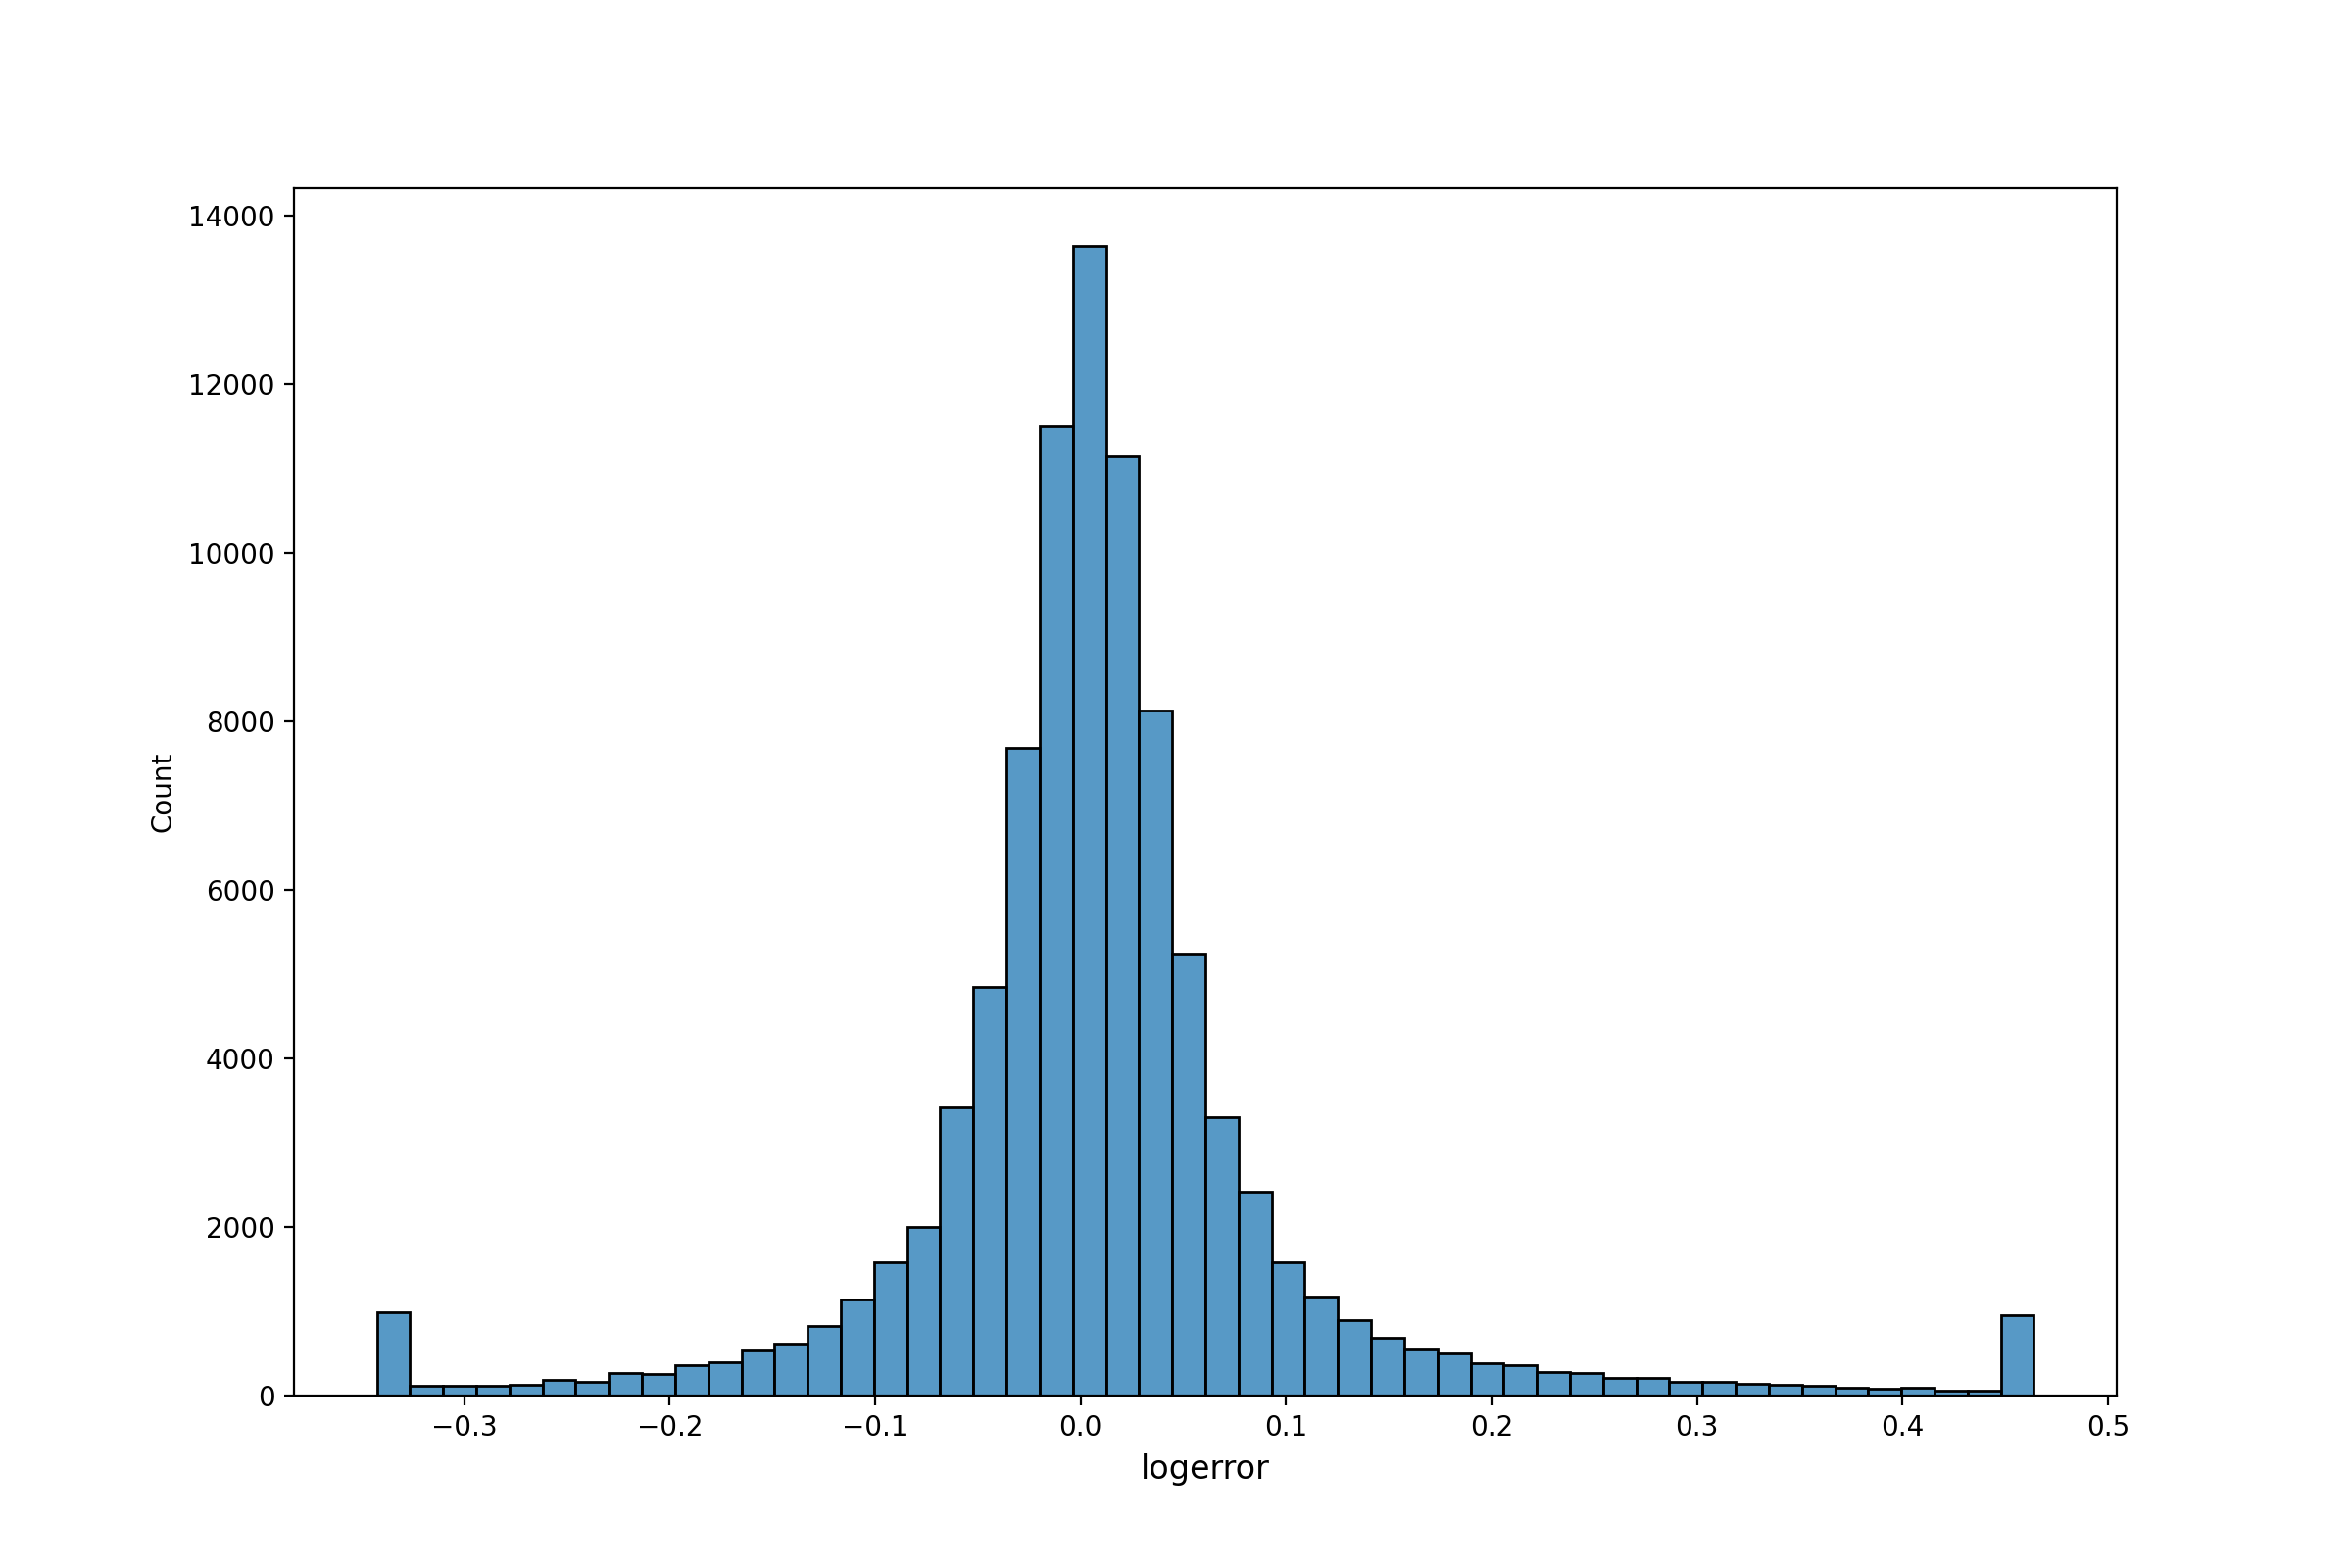

In [37]:
upper_limit = np.percentile(df_train_2016.logerror.values, 99)
lower_limit = np.percentile(df_train_2016.logerror.values, 1)
df_train_2016['logerror'].loc[df_train_2016['logerror'] > upper_limit] = upper_limit
df_train_2016['logerror'].loc[df_train_2016['logerror'] < lower_limit] = lower_limit

plt.figure(figsize = (12,8))
sns.histplot(df_train_2016.logerror.values, bins = 50)
plt.xlabel('logerror', fontsize = 12)
plt.show()

### Drop columns with high ratio of empty values

In [38]:
drop_list = missing_df.loc[missing_df['missing_ratio'] > 0.999].column_name.tolist()
for drop in drop_list:
    if drop in df_train_2016.columns:
        df_train_2016 = df_train_2016.drop(drop, axis=1)
    if drop in df_test_2016.columns:
        df_test_2016 = df_test_2016.drop(drop, axis=1)
df_train_2016.shape

(90275, 56)

### Drop rows that have missing values

In [39]:
# drop rows that have missing values for logerror
df_train_2016 = df_train_2016[df_train_2016.logerror.notnull()]
df_train_2016.shape

(90275, 56)

### Convert datetime data type to int data type

In [40]:
# convert datetime to float
df_train_2016['transactiondate'] = pd.to_datetime(df_train_2016['transactiondate'])
df_train_2016['transactiondate'] = df_train_2016['transactiondate'].dt.year + df_train_2016['transactiondate'].dt.month/12.0 + df_train_2016['transactiondate'].dt.day/365.0
df_train_2016.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016.086073,1.0,0.0,2.0,3.0,4.0,2.0,0.0,...,0.0,0,122754.0,360170.0,2015.0,237416.0,6735.88,0,0.0,6.037107e+13
1,14366692,-0.1684,2016.086073,0.0,0.0,3.5,4.0,0.0,3.5,0.0,...,0.0,0,346458.0,585529.0,2015.0,239071.0,10153.02,0,0.0,0.000000e+00
2,12098116,-0.0040,2016.086073,1.0,0.0,3.0,2.0,4.0,3.0,0.0,...,0.0,0,61994.0,119906.0,2015.0,57912.0,11484.48,0,0.0,6.037464e+13
3,12643413,0.0218,2016.088813,1.0,0.0,2.0,2.0,4.0,2.0,0.0,...,0.0,0,171518.0,244880.0,2015.0,73362.0,3048.74,0,0.0,6.037296e+13
4,14432541,-0.0050,2016.088813,0.0,0.0,2.5,4.0,0.0,2.5,0.0,...,2.0,0,169574.0,434551.0,2015.0,264977.0,5488.96,0,0.0,6.059042e+13


# Prediction

### Training and test data

In [41]:
x_train = df_train_2016
for column in ['parcelid', 'logerror', 'propertyzoningdesc', 'propertycountylandusecode','fireplacecnt', 'fireplaceflag', 'hashottuborspa', 'taxdelinquencyflag']:
    if column in x_train.columns:
        x_train = x_train.drop(column, axis=1)
x_train.head()

,transactiondate,airconditioningtypeid,architecturalstyletypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
0,2016.086073,1.0,0.0,2.0,3.0,4.0,2.0,0.0,0.0,1684.0,...,0.0,1959.0,0.0,122754.0,360170.0,2015.0,237416.0,6735.88,0.0,6.037107e+13
1,2016.086073,0.0,0.0,3.5,4.0,0.0,3.5,0.0,0.0,2263.0,...,0.0,2014.0,0.0,346458.0,585529.0,2015.0,239071.0,10153.02,0.0,0.000000e+00
2,2016.086073,1.0,0.0,3.0,2.0,4.0,3.0,0.0,0.0,2217.0,...,0.0,1940.0,0.0,61994.0,119906.0,2015.0,57912.0,11484.48,0.0,6.037464e+13
3,2016.088813,1.0,0.0,2.0,2.0,4.0,2.0,0.0,0.0,839.0,...,0.0,1987.0,0.0,171518.0,244880.0,2015.0,73362.0,3048.74,0.0,6.037296e+13
4,2016.088813,0.0,0.0,2.5,4.0,0.0,2.5,0.0,0.0,2283.0,...,0.0,1981.0,2.0,169574.0,434551.0,2015.0,264977.0,5488.96,0.0,6.059042e+13


In [42]:
x_test = df_test_2016
for column in ['parcelid', '201610', '201611', '201612', '201710', '201711', '201712', 'propertyzoningdesc', 'propertycountylandusecode','fireplacecnt', 'fireplaceflag', 'hashottuborspa', 'taxdelinquencyflag']:
    if column in x_test.columns:
        x_test = x_test.drop(column, axis=1)
x_test.insert(0, 'transactiondate', 0)
x_test.head()

,transactiondate,airconditioningtypeid,architecturalstyletypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,2015.0,9.0,0.00,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,27516.0,2015.0,27516.0,0.00,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73026.0,...,0.0,0.0,0.0,650756.0,1413387.0,2015.0,762631.0,20800.37,0.0,0.0
3,0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,5068.0,...,0.0,1948.0,1.0,571346.0,1156834.0,2015.0,585488.0,14557.57,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1776.0,...,0.0,1947.0,0.0,193796.0,433491.0,2015.0,239695.0,5725.17,0.0,0.0


### Data Split for training

In [43]:
# split data for cross validation
y_train = df_train_2016['logerror'].values
X = x_train
Y = y_train
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f'Xtrain.shape: {Xtrain.shape}')
print(f'Xvalid.shape: {Xtest.shape}')
print(f'ytrain.shape: {Ytrain.shape}')
print(f'yvalid.shape: {Ytest.shape}')

Xtrain.shape: (72220, 48)
Xvalid.shape: (18055, 48)
ytrain.shape: (72220,)
yvalid.shape: (18055,)


### Check Accuracy of Model

In [44]:
def print_MAE(model, test):
    """
    Prints the mean absolute error of the model on the test set

    Parameters
    ----------
    model: The model to be evaluated
    test: The formatted test input for the model

    Returns
    -------
    None
    """
    Y_pred = model.predict(test)
    print(f'MAE: {metrics.mean_absolute_error(Ytest, Y_pred)}')

### Xgboost

In [45]:
y_mean = np.mean(Ytrain)
xgb_params = {
    'eta': 0.037,
    'max_depth': 5,
    'subsample': 0.80,
    'objective': 'reg:linear',
    'eval_metric': 'mae',
    'lambda': 0.8,   
    'alpha': 0.4, 
    'base_score': y_mean,
    'silent': 1
}
dtrain = xgb.DMatrix(Xtrain, Ytrain)
dtest = xgb.DMatrix(Xtest)
num_boost_rounds = 50

xgb_model = xgb.train(dict(xgb_params, verbosity=0), dtrain, num_boost_round=num_boost_rounds)

In [46]:
# Xgboost
print_MAE(xgb_model, dtest)

MAE: 0.05972340697221498


# Submission

### Preparing Submission Data

In [47]:
test_dates_in_datetime = ['2016-10-01','2016-11-01','2016-12-01','2017-10-01','2017-11-01','2017-12-01']
test_dates = []
for date in test_dates_in_datetime:
    # convert date to float
    date = date.split('-')
    test_dates.append(float(date[0]) + float(date[1])/12.0 + float(date[2])/365.0)
print(test_dates)
test_columns = ['201610','201611','201612','201710','201711','201712']

[2016.8360730593606, 2016.919406392694, 2017.0027397260274, 2017.8360730593606, 2017.919406392694, 2018.0027397260274]


### Helper Function to Generate Submission

In [48]:
def run_model(model):
    """
    Ouputs the predictions of the model on the test set

    Parameters
    ----------
    model: The model to be evaluated

    Returns
    -------
    new_submission: The predictions of the model on the test set

    """
    new_submission = test.copy()
    new_test = x_test.copy()
    for i in range(len(test_dates)):
        new_test['transactiondate'] = test_dates[i]
        pred = model.predict(xgb.DMatrix(new_test))
        new_submission[test_columns[i]] = [float(format(output, '.4f')) for output in pred]
    print(new_submission)
    return new_submission

def save_submission(submission, model_name):
    print("Saving submission...")
    """
    Saves the submission to a csv file

    Parameters
    ----------
    submission: The submission to be saved
    model_name: The name of the model

    Returns
    -------
    None
    """
    submission.to_csv(f'{model_name}.csv', index=False)
    print('Submission saved')

### Submission for Xgboost

In [49]:
new_submission = run_model(xgb_model)
save_submission(new_submission, 'xgboost')

          parcelid  201610  201611  201612  201710  201711  201712
0         10754147  0.0313  0.0313  0.0313  0.0313  0.0313  0.0313
1         10759547  0.0172  0.0172  0.0172  0.0172  0.0172  0.0172
2         10843547  0.0632  0.0658  0.0658  0.0658  0.0658  0.0658
3         10859147  0.0460  0.0460  0.0460  0.0460  0.0460  0.0460
4         10879947  0.0062  0.0062  0.0062  0.0062  0.0062  0.0062
...            ...     ...     ...     ...     ...     ...     ...
2985212  168176230  0.1375  0.1375  0.1375  0.1375  0.1375  0.1375
2985213   14273630  0.1375  0.1375  0.1375  0.1375  0.1375  0.1375
2985214  168040630  0.1375  0.1375  0.1375  0.1375  0.1375  0.1375
2985215  168040830  0.1375  0.1375  0.1375  0.1375  0.1375  0.1375
2985216  168040430  0.1375  0.1375  0.1375  0.1375  0.1375  0.1375

[2985217 rows x 7 columns]
Saving submission...
Submission saved
